# Clustering Categorical Data 

## Import the relevant libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [18]:
# Load the data
raw_data = pd.read_csv('Categorical.csv')
# Check the data
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [19]:
data = raw_data.copy()
data =data.drop_duplicates()

In [20]:
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [21]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Select the features

In [22]:
x = data_mapped.iloc[:,3:4]

## Clustering

Use 4 clusters initially.

In [23]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [24]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 3, 1, 0, 0, 0, 0, 3, 1, 3, 2, 2, 2, 2, 0, 2, 0, 3, 1, 0, 1, 1,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 1, 0, 1, 3, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 3, 2, 0, 0, 0, 0, 3, 0, 3, 3, 2, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0,
       3, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 2, 1, 1, 0, 2, 1, 3,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 3, 2, 2, 3, 3, 0, 2, 1, 3, 2, 2, 0, 0,
       3, 0, 1, 3, 2, 3, 0, 0, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1, 1, 3, 3, 3, 3, 2, 0, 1,
       3, 3, 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 3, 2, 2, 2, 3, 1, 1, 1])

In [25]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,1,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,2,3
238,South Africa,25.083901,-29.000341,3,1
239,Zambia,27.774759,-13.458242,3,1


## Plot the data

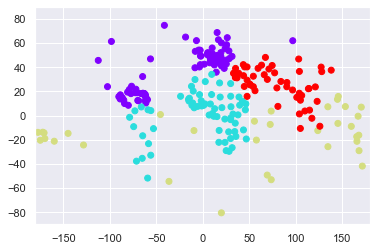

In [26]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [ ]:
# try same for k=3 cluster

In [27]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0,
       0, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 1,
       0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0])

In [29]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,2,0
2,Angola,17.537368,-12.293361,3,0
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,1,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,2,0
238,South Africa,25.083901,-29.000341,3,0
239,Zambia,27.774759,-13.458242,3,0


In [30]:
# plot the data for k=3

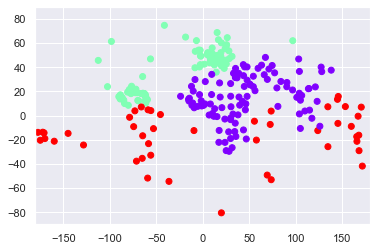

In [31]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()